<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/upper_confidence_bound_reinforce_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

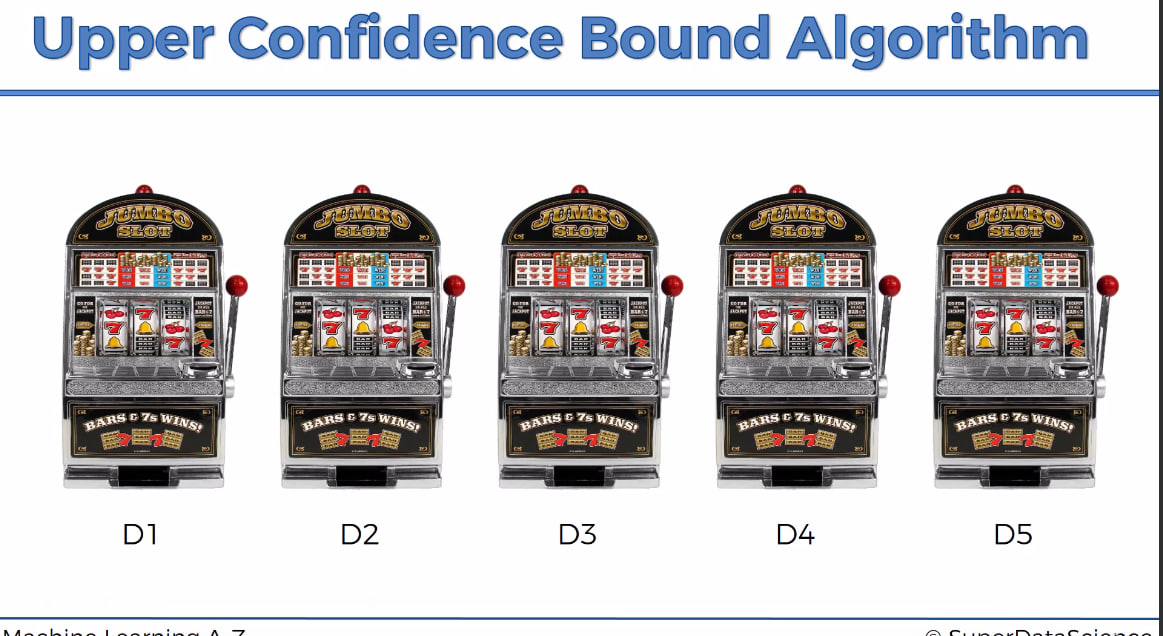

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

each row is correspond to different user and each column is for one advertising

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part6-ReinforcementLearning/Section32-UperConfidenceBound(UCB)/Ads_CTR_Optimisation.csv')

## Implementing UCB

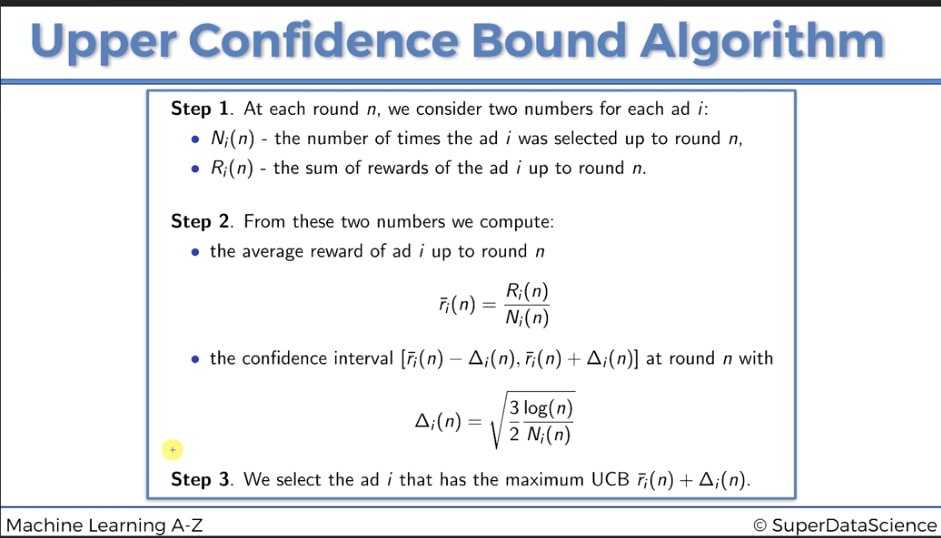

In [18]:
import math
N=10000 #the total number of user
d=10 #number of adv
ads_selected=[]                  #every round the ads_selected will be reset to calculate new reward
numbers_of_selections = [0] * d  #number of time which one adv seleced
sums_of_rewards = [0] * d        #the sum of the reward for each adv-defaukt value is number od adv * zero which gaine=> 10 zero because of 10 adv
total_reward=0 #number of reward in each round

for n in range(0,N):
  # move into all adv
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if (numbers_of_selections[i]>0):
      # implement r=Ri/Ni
      average_reward=sums_of_rewards[i]/numbers_of_selections[i]

      #implement delta=sqrt(3log(n)/2N(i))
      delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i]) #n+1 => because list in python start from 0 but we need to count number of person from 0

      # implement step 3
      upper_bound=average_reward+delta_i
    else:                     #has not been selected  any ads yet- base on this algoritm , all adv must be selected
      #step3
      upper_bound=1e400      #super high value
    if (upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i                 #select the adv that not selected yet

  #update variables
  ads_selected.append(ad)
  numbers_of_selections[ad]=numbers_of_selections[ad]+1

  reward=dataset.values[n,ad]
  sums_of_rewards[ad]=sums_of_rewards[ad]+ reward
  total_reward=total_reward+reward







## Visualising the results

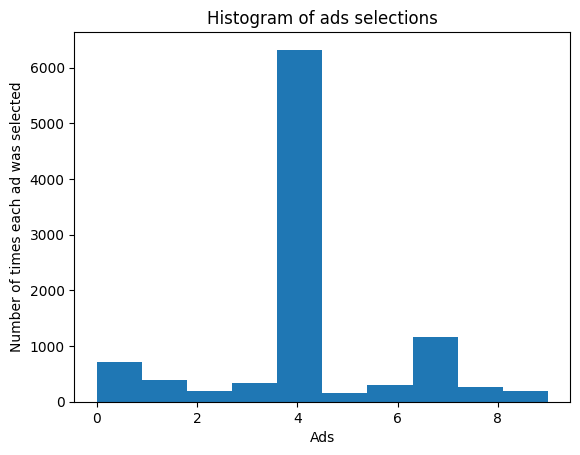

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()